In [ ]:
from CNN_heuristic import *

In [ ]:
name = 'CNN_heuristic'
model_path = f'../models/{name}.keras'

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('../data/LaFleur_supp.csv')

X = df[['Promoter Sequence']].astype(str).agg(''.join, axis=1)
y = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())

X = preprocess_sequences(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# model = build_cnn_model(X.shape[1:])
# history = train_model(model, X_train, y_train, X_test, y_test)
# loss = evaluate_model(model, X_test, y_test)
# model.save(model_path)

In [ ]:
model = load_model(model_path)
y_pred = model.predict(X_test)

305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
mse, rmse, mae, r2 = calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

MSE:  0.0023964821963959972
RMSE:  0.048953878256947095
MAE:  0.030634852028956255
R2:  0.8730241875232737


305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


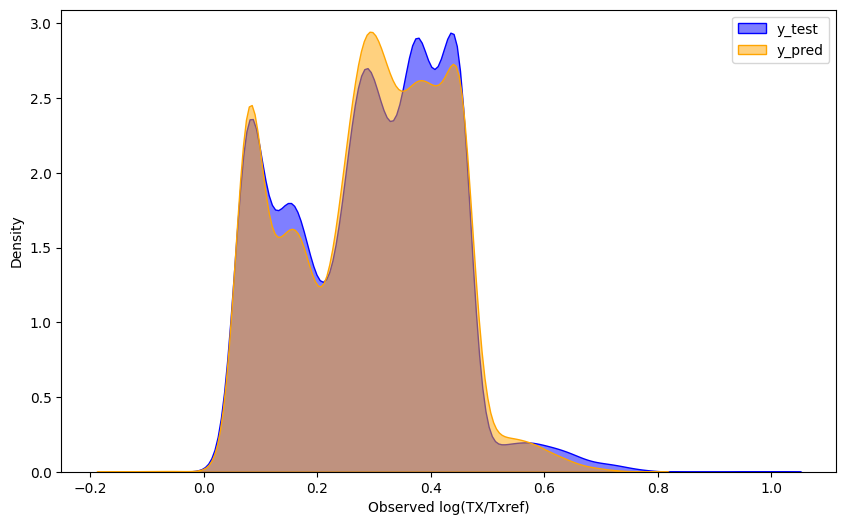

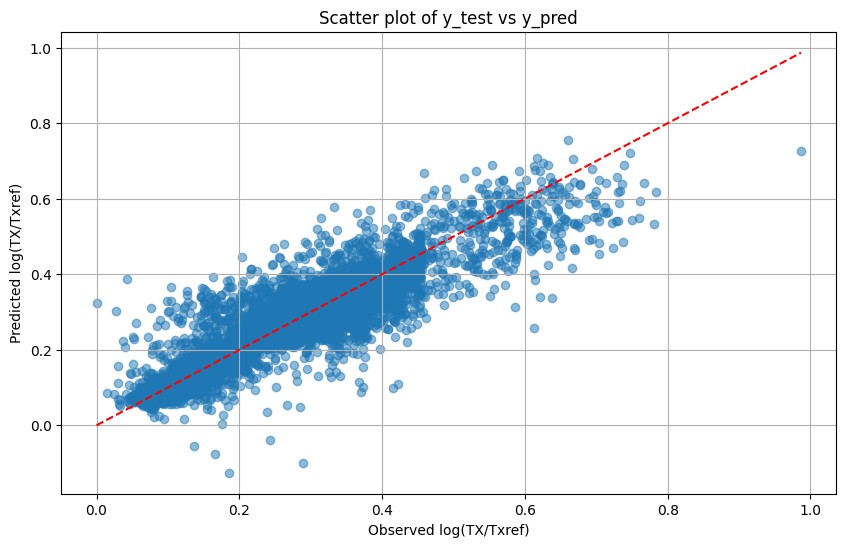

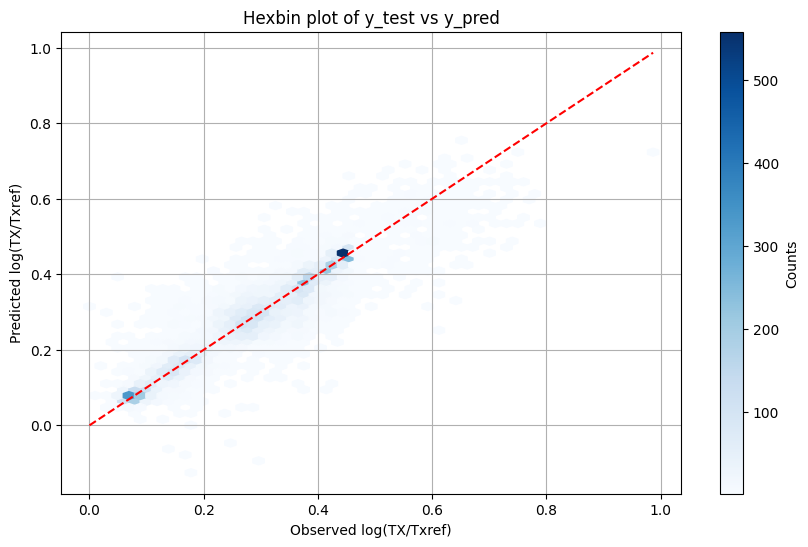

In [ ]:
plot_kde(y_test, y_pred)
plot_scatter(y_test, y_pred)
plot_hexbin(y_test, y_pred)